In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df.production_budget=df.production_budget.apply(lambda x: x.strip('$'))
df.production_budget=df.production_budget.replace({",":''}, regex=True).apply(pd.to_numeric)
df.domestic_gross=df.domestic_gross.apply(lambda x: x.strip('$'))
df.domestic_gross=df.domestic_gross.replace({",":''}, regex=True).apply(pd.to_numeric)
df.worldwide_gross=df.worldwide_gross.apply(lambda x: x.strip('$'))
df.worldwide_gross=df.worldwide_gross.replace({",":''}, regex=True).apply(pd.to_numeric)
df['domestic_profit']=df.domestic_gross-df.production_budget
df['worldwide_profit']=df.worldwide_gross-df.production_budget
df.release_date=pd.to_datetime(df.release_date)
df['release_year'] = df['release_date'].apply(lambda x: x.year)
df['release_month'] = df['release_date'].apply(lambda x: x.month)
df['release_day'] = df['release_date'].apply(lambda x: x.day)

In [5]:
bydates=df.sort_values(by = 'release_date')
low_cutoff=pd.to_datetime('2008')
high_cutoff=pd.to_datetime('2019')
bydate_temp=bydates.loc[(bydates.release_date >=low_cutoff)&(bydates.release_date<=high_cutoff)]
bydate=bydate_temp
# .loc[bydates.domestic_gross!=0]

In [6]:
df2=bydate.groupby('release_year')

In [7]:
bydate['profit_margin']=bydate.worldwide_profit/bydate.production_budget

/home/will/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
# plt.figure(figsize=(12,10))
# plot1 = sns.boxplot(x="release_year", y="production_budget", data=bydate)


In [9]:
by_pm_temp=bydate.sort_values(by='profit_margin')

In [10]:
by_pm_temp.tail(10)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,release_year,release_month,release_day,profit_margin
5189,90,2014-03-21,Godâs Not Dead,1150000,60755732,63777092,59605732,62627092,2014,3,21,54.458341
4249,50,2017-01-20,Split,5000000,138141585,278964806,133141585,273964806,2017,1,20,54.792961
4664,65,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,81752907,174512032,2010,10,20,58.170677
5213,14,2015-04-17,Unfriended,1000000,32789645,64364198,31789645,63364198,2015,4,17,63.364198
5062,63,2011-04-01,Insidious,1500000,54009150,99870886,52509150,98370886,2011,4,1,65.580591
5428,29,2008-09-26,Fireproof,500000,33456317,33473297,32956317,32973297,2008,9,26,65.946594
5459,60,2009-04-23,Home,500000,15433,44793168,-484567,44293168,2009,4,23,88.586336
5211,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,52262945,100759490,2012,1,6,100.759490
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,22664410,41556474,2015,7,10,415.564740
5492,93,2009-09-25,Paranormal Activity,450000,107918810,194183034,107468810,193733034,2009,9,25,430.517853


In [11]:
by_pm=by_pm_temp.drop([5679,5492,5211,5459])
by_pm=by_pm.sort_values(by='release_year')

Text(0.5, 1.0, 'Distribution of Profit Percentage by Year')

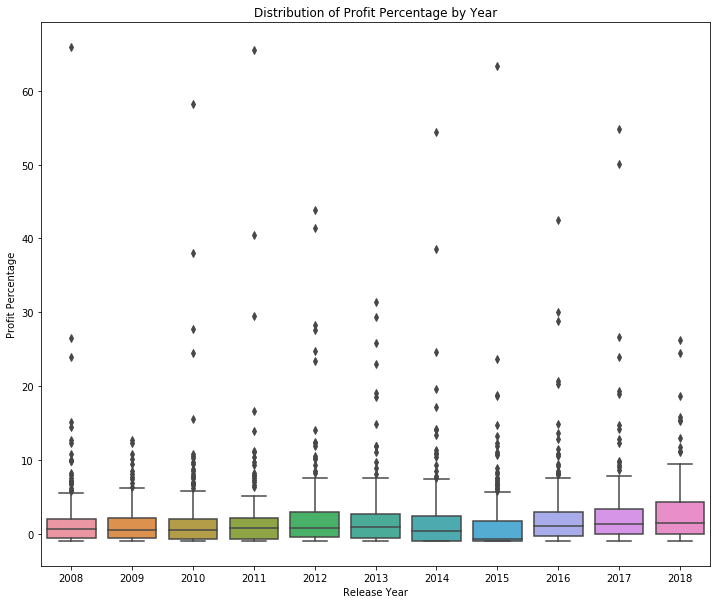

In [14]:
plt.figure(figsize=(12,10))
plot2 = sns.boxplot(x="release_year", y="profit_margin", data=by_pm)
plot2.set(xlabel='Release Year', ylabel='Profit Percentage')
plot2.set_title('Distribution of Profit Percentage by Year')

In [15]:
fig=plot2.get_figure()
fig.savefig('Profit_Margin_Year')

In [119]:
# pd.concat([by_pm[['release_year','domestic_profit','region']],by_pm[['release_year','foreign_profit','region']]

In [120]:
test=by_pm[['profit_margin','release_year']]

In [121]:
year_quantiles=test.groupby('release_year').quantile(.90).reindex()

In [135]:
merged=year_quantiles.merge(by_pm, on='release_year')


(2480, 13)

In [123]:
top5=merged.loc[merged.profit_margin_y >= merged.profit_margin_x]

In [124]:
top5.release_month

158     11
159     10
160      4
161      7
162      3
        ..
2437    12
2439    10
2449     6
2455    12
2457     2
Name: release_month, Length: 252, dtype: int64

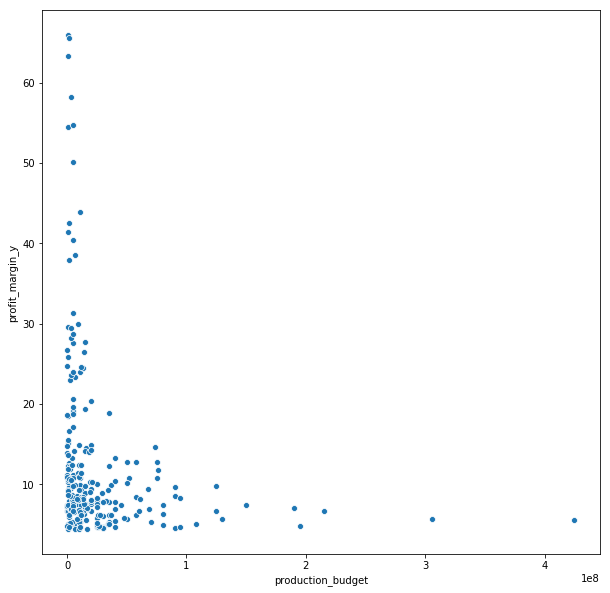

In [125]:
plt.close()
plt.figure(figsize=(10,10))
plot1 = sns.scatterplot(x="production_budget", y="profit_margin_y", data=top5)

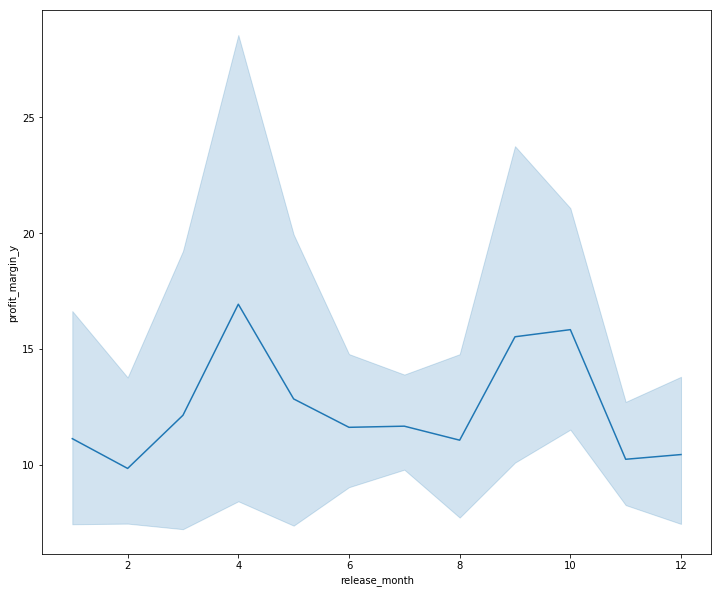

In [126]:

plt.figure(figsize=(12,10))
plot1 = sns.lineplot(x="release_month", y="profit_margin_y", data=top5)

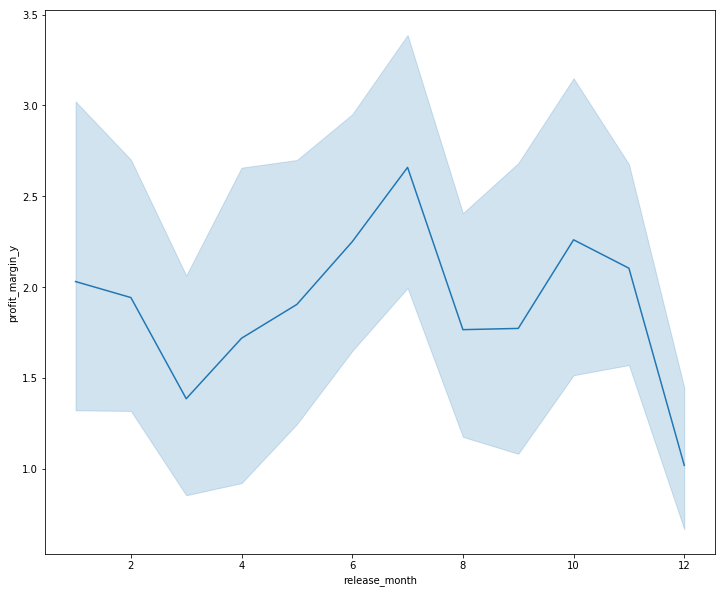

In [136]:
plt.figure(figsize=(12,10))
plot1 = sns.lineplot(x="release_month", y="profit_margin_y", data=merged)

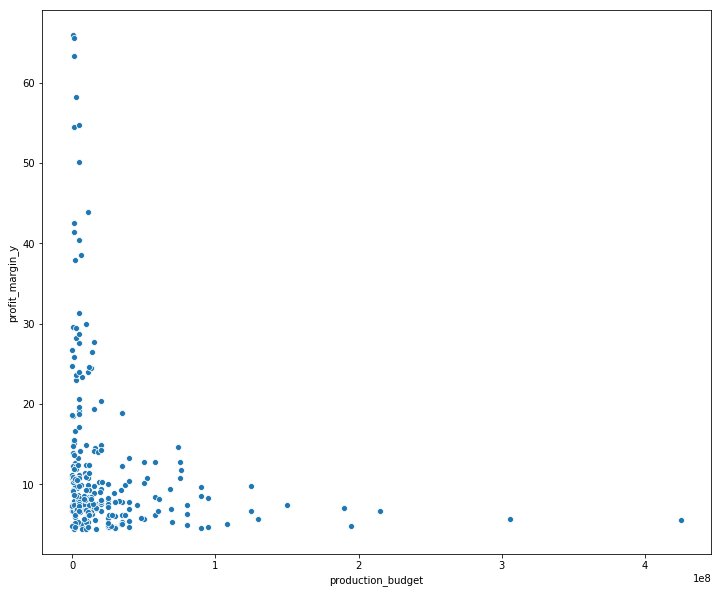

In [129]:
plt.figure(figsize=(12,10))
plot1 = sns.scatterplot(x="production_budget", y="profit_margin_y", data=top5)

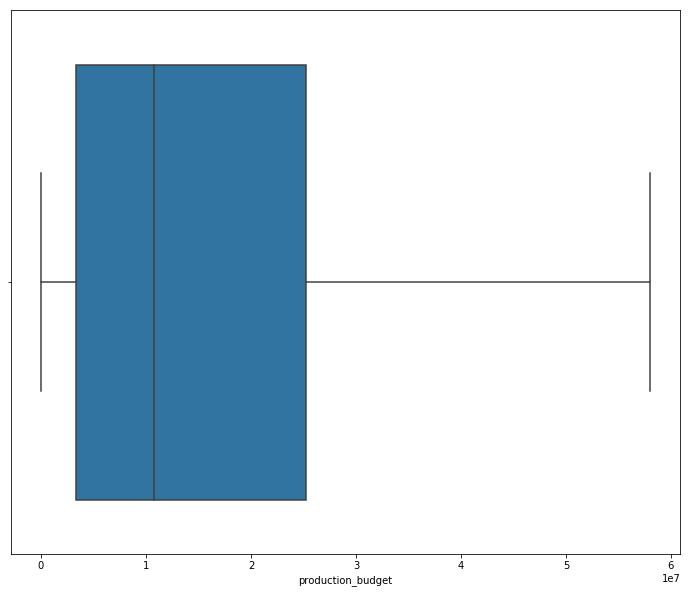

In [134]:
plt.figure(figsize=(12,10))
sns.boxplot(x="production_budget", data=top5, showfliers=False)

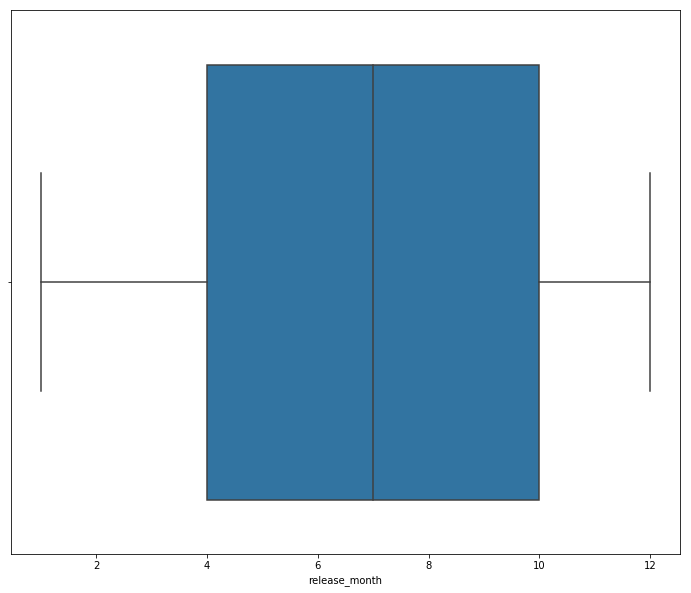

In [137]:
plt.figure(figsize=(12,10))
sns.boxplot(x="", data=top5, showfliers=False)